In [ ]:
#Checking for GPU

!nvidia-smi

Mon Mar 24 15:39:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
#Storing path into HOME

import os
%cd /content/drive/MyDrive/Fused_Train_LBP
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Fused_Train_LBP
/content/drive/MyDrive/Fused_Train_LBP


In [ ]:
#!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

/content/drive/MyDrive/Fused_Train_LBP/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.8 MB/s eta 0:00:00


In [ ]:
#Downloading weights

!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
%cd {HOME}/yolov9

/content/drive/MyDrive/Fused_Train_LBP/yolov9


In [ ]:
#Using roboflow to install the dataset
'''
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3LTWFbmkUdNxoTQmynVW")
project = rf.workspace("thermal-imaging-0hwfw").project("flir-data-set")
version = project.version(27)
dataset = version.download("yolov9")
'''

'\n!pip install roboflow\n\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="3LTWFbmkUdNxoTQmynVW")\nproject = rf.workspace("thermal-imaging-0hwfw").project("flir-data-set")\nversion = project.version(27)\ndataset = version.download("yolov9")\n'

In [ ]:
%cd {HOME}/yolov9
DATASET='/content/drive/MyDrive/Dataset/llvip-fused-lbp-320'

!python train.py \
--batch 16 --epochs 10 --img 320 --device 0 --min-items 0 --close-mosaic 15 \
--data {DATASET}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/drive/MyDrive/Fused_Train_LBP/yolov9
2025-03-23 17:53:08.734193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742752388.769814   45086 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742752388.777135   45086 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-23 17:53:08.803734: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wa

In [ ]:

!ls {HOME}/yolov9/runs/train/exp5/

events.out.tfevents.1742744198.59af658b055c.5655.0  labels_correlogram.jpg  opt.yaml	 weights
hyp.yaml					    labels.jpg		    results.csv


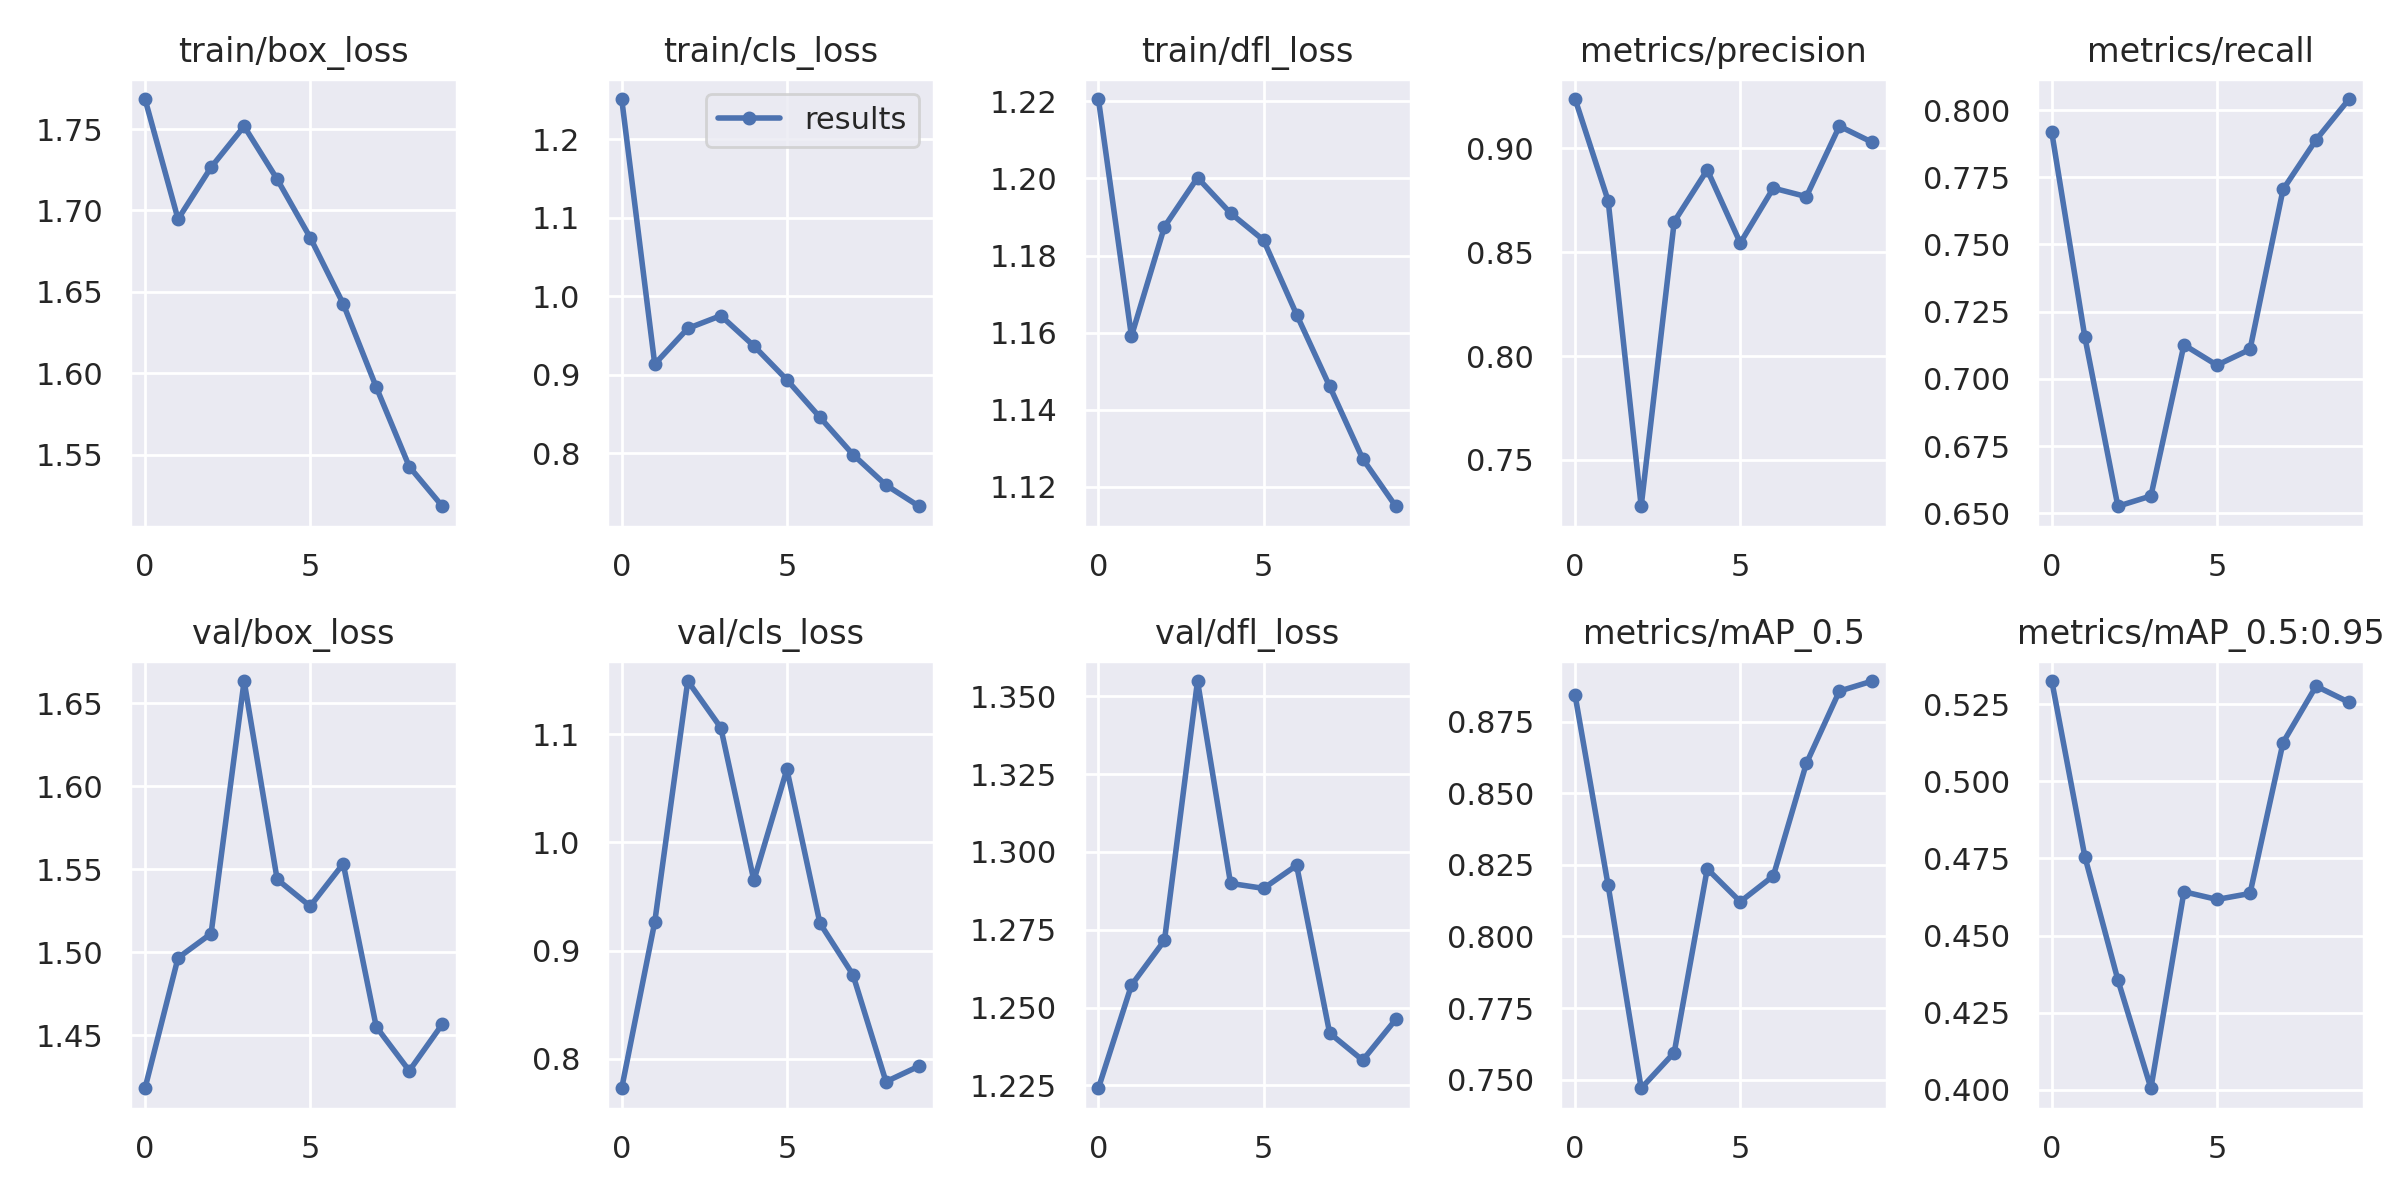

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp5/results.png", width=1000)

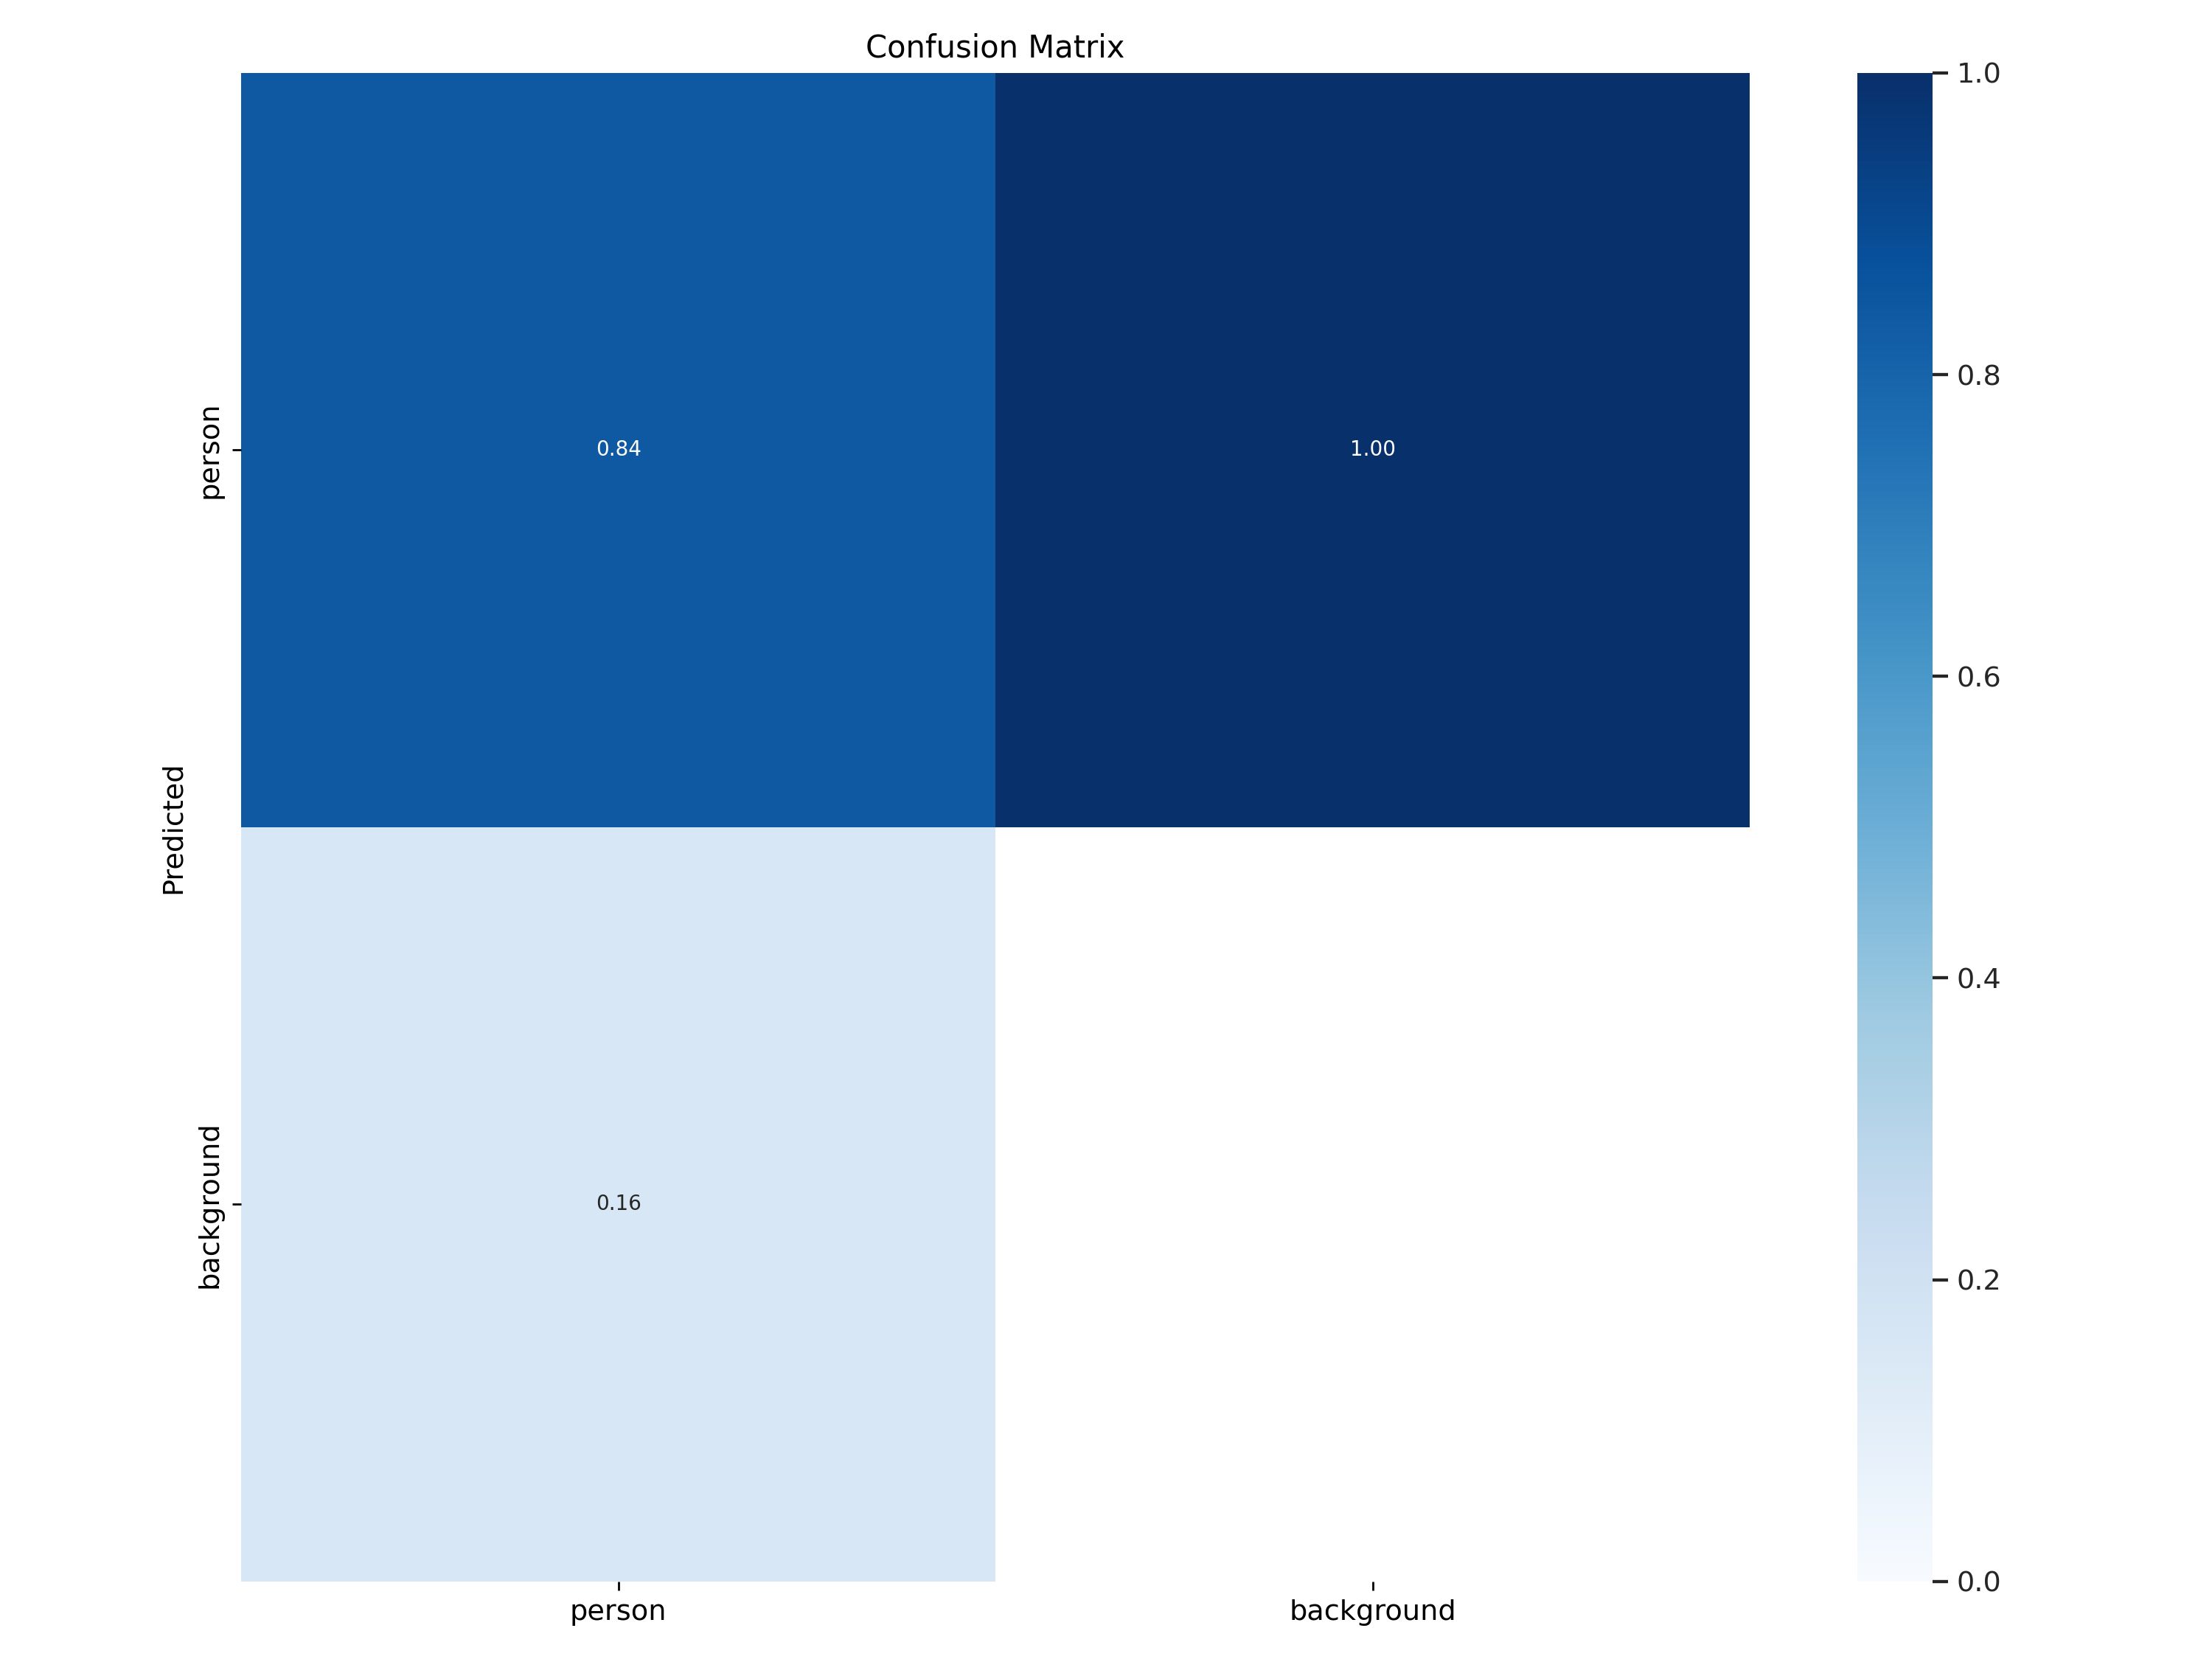

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp5/confusion_matrix.png", width=1000)

In [ ]:
# from IPython.display import Image

# Image(filename=f"{HOME}/yolov9/runs/train/exp2/val_batch1_pred.jpg", width=1000)

In [ ]:
#Validating cusotm model


%cd {HOME}/yolov9

!python val.py \
--img 320 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {DATASET}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp5/weights/best.pt

/content/drive/MyDrive/Fused_Train_LBP/yolov9
val: data=/content/drive/MyDrive/Dataset/llvip-fused-lbp-320/data.yaml, weights=['/content/drive/MyDrive/Fused_Train_LBP/yolov9/runs/train/exp5/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/drive/MyDrive/Dataset/llvip-fused-lbp-320/test/labels.cache... 2996 images, 0 backgrounds, 0 corrupt: 100% 2996/2996 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   1% 1/94 [00:32<49:46, 32.11s/it]Exception in thread Thread-3 (plot_ima

In [ ]:
#Testing

!python detect.py \
--img 320 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp5/weights/best.pt \
--source {DATASET}/test/images


detect: weights=['/content/drive/MyDrive/Fused_Train_LBP/yolov9/runs/train/exp5/weights/best.pt'], source=/content/drive/MyDrive/Dataset/llvip-fused-lbp-320/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
image 1/2996 /content/drive/MyDrive/Dataset/llvip-fused-lbp-320/test/images/190001_jpg.rf.7746f73273168e8303e1b72c317a880d.jpg: 256x320 3 persons, 60.9ms
image 2/2996 /content/drive/MyDrive/Dataset/llvip-fused-lbp-320/test/images/190002_jpg.rf.bc295655526ea1ee56

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp5/*.jpg')[:2]:
      display(Image(filename=image_path, width=320))

## Fusion


In [ ]:
import cv2
import numpy as np
import pywt
import os

In [ ]:
def apply_sharpen_filter(image):
    # Define the sharpening kernel
    sharpen_kernel = np.array([[-1, -1, -1],
                                [-1, 9, -1],
                                [-1, -1, -1]])
    # Apply the kernel to the image
    sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)
    # Resize the output image
    #sharpened_image = cv2.resize(sharpened_image, (640, 512))
    return sharpened_image

In [ ]:
def morphology_hat_transform(image):
    """
    Compute the Morphology-Hat Transform Image (MT) using the formula:
    MT(x, y) = f(x, y) + THT(x, y) + BHT(x, y)

    """

    # Define a structuring element (kernel) for morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    print(kernel)
    # Compute the Top-Hat Transform (THT)
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

    # Compute the Black-Hat Transform (BHT)
    black_hat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

    # Compute the Morphology-Hat Transform (MT)
    mt_image = cv2.add(image, cv2.add(top_hat, black_hat))
    #mtimage_final=cv2.resize(mt_image,(640,512))
    return mt_image

In [ ]:
def high_boost_filter(image):
    # Define the 3×3 high-boost filter kernel
    high_boost_kernel = np.array([[ 0,  -1,  0],
                               [-1,  5.3, -1],
                               [ 0,  -1,  0]], dtype=np.float32)
    # Apply the filter using 2D convolution
    high_boost_image = cv2.filter2D(image, -1, high_boost_kernel)
    # Clip values to stay within 0-255 range and convert to uint8
    high_boost_image = np.clip(high_boost_image, 0, 255).astype(np.uint8)
    return high_boost_image

In [ ]:
def mean_value(image):
    return np.mean(image)

In [ ]:
def max_value(image):
    return np.max(image)

In [ ]:
# To compute weights
def compute_weights(ma, mb):
    total = abs(ma) + abs(mb)
    wa = abs(ma) / total
    wb = abs(mb) / total
    return wa, wb

In [ ]:
def dwt_fusion(image1, image2):

    image1 = high_boost_filter(image1)
    #To Apply DWT on both images (Single-level DWT)
    coeffs1 = pywt.dwt2(image1, 'db1')
    coeffs2 = pywt.dwt2(image2, 'db1')

    # Extract approximation(LL) and detail coefficients
    LL1, (LH1, HL1, HH1) = coeffs1
    LL2, (LH2, HL2, HH2) = coeffs2

    # Mean weighted fusion rule for approximation coefficients
    mean_image1 = mean_value(image1)
    mean_image2 = mean_value(image2)
    w1, w2 = compute_weights(mean_image1, mean_image2)

    # Approximation coeffiecient for fused image
    LL = w1 * LL1 + w2 * LL2

    # Max weighted fusion rule for detail coefficients
    max_image1 = max_value(image1)
    max_image2 = max_value(image2)
    w3, w4 = compute_weights(max_image1, max_image2)

    # Detail coefficients to perform fusion
    LH = w3 * LH1 + w4 * LH2
    HL = w3 * HL1 + w4 * HL2
    HH = w3 * HH1 + w4 * HH2

    # Reconstruct the fused image using IDWT
    fused_image = pywt.idwt2((LL, (LH, HL, HH)), 'db1')
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)   #np.uint8(fused_image)
    #fused_image_final=cv2.resize(fused_image,(640,512))
    return fused_image

In [ ]:
def modal_fusion_dwt(visible_image_path,thermal_image_path,output_folder):
    modified_visible = None
    modified_thermal = None

    #To extractjust the filename from visible image path
    filename = os.path.splitext(os.path.basename(visible_image_path))[0]

    os.chdir(output_folder)

    visible_image = cv2.imread(visible_image_path)
    thermal_image = cv2.imread(thermal_image_path)

    # Resize the input images
    visible_image = cv2.resize(visible_image, (640, 512))
    thermal_image = cv2.resize(thermal_image, (640, 512))

    # Convert the image to grayscale if it's in color
    if len(visible_image.shape) == 3:
        visible_image = cv2.cvtColor(visible_image, cv2.COLOR_BGR2GRAY)
    # Convert the image to grayscale if it's in color
    if len(thermal_image.shape) == 3:
       thermal_image = cv2.cvtColor(thermal_image, cv2.COLOR_BGR2GRAY)

    modified_visible = morphology_hat_transform(visible_image)
    modified_thermal = apply_sharpen_filter(thermal_image)
    dwt_fused = dwt_fusion(modified_visible, modified_thermal)

    dwt_fused = cv2.resize(dwt_fused, (640, 512))
    dwt_fused = cv2.normalize(dwt_fused, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    filename = filename + "_fused.jpg"
    output_path = os.path.join(output_folder,filename)
    cv2.imwrite(filename,dwt_fused)
    return dwt_fused,output_path

## Frontend

In [ ]:
# def pred(img):
#   !python {HOME}/yolov9/detect.py --weights {HOME}/yolov9/runs/train/exp/weights/best.pt --conf 0.6 --source {img} --device 0 --exist-ok --hide-labels --hide-conf

In [ ]:
!pip install pyngrok

In [ ]:
!ngrok config add-authtoken 2sM0BFRYIxPqWNtzgbrs7TbrmEd_qpaBXQE6io719CQDRALW

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
#Frontend
!pip install -q streamlit
#pred(/content/drive/MyDrive/Dataset/llvip-visible-320/test/images/190001_jpg.rf.4eb9c786db328898eed7e8fce1a5f4f8.jpg)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.4 MB/s eta 0:00:00


In [ ]:
# %%writefile app.py
# import streamlit as st
# from PIL import Image
# import os

# def pred(img):
#     cmd = f'python yolov9/detect.py --weights yolov9/runs/train/exp/weights/best.pt --conf 0.55 --source {img} --device 0 --exist-ok --line-thickness 2'
#     os.system(cmd)

# st.title("Visual Image Pedestrian Detection")

# # Text input for image path
# img = st.text_input("Enter Image path:", "/content/drive/MyDrive/Dataset/llvip-visible-320/test/images/190001_jpg.rf.4eb9c786db328898eed7e8fce1a5f4f8.jpg")

# # Initialize session state variables
# if "original_image_path" not in st.session_state:
#     st.session_state.original_image_path = None  # Stores original image path
# if "detect_clicked" not in st.session_state:
#     st.session_state.detect_clicked = False  # Tracks if Detect was clicked

# # Confirm button - Stores the selected image path
# if st.button("Confirm"):
#     st.session_state.original_image_path = img  # Save image path in session state
#     st.session_state.detect_clicked = False  # Reset detect state when confirming new image

# # Display original image if confirmed
# if st.session_state.original_image_path:
#     showimg = Image.open(st.session_state.original_image_path)
#     st.image(showimg, caption="Original Image")

# # Detect button - Runs detection and updates session state
# if st.button("Detect"):
#     with st.spinner("Processing..."):
#         pred(st.session_state.original_image_path)
#     st.session_state.detect_clicked = True  # Mark detection as done

# # Display prediction only after Detect is clicked
# if st.session_state.detect_clicked:
#     predicted_img_path = f'/content/drive/MyDrive/Visual_Train/yolov9/runs/detect/exp/{st.session_state.original_image_path.split("/")[-1]}'

#     if os.path.exists(predicted_img_path):  # Ensure file exists before displaying
#         showpred = Image.open(predicted_img_path)
#         st.image(showpred, caption="Predicted Image")
#     else:
#         st.error("Prediction image not found. Please check if detection ran successfully.")


Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import os

import cv2
import numpy as np
import pywt

from skimage.feature import local_binary_pattern

HOME= r'/content/drive/MyDrive/Fused_Train'

def apply_sharpen_filter(image):
    # Define the sharpening kernel
    sharpen_kernel = np.array([[-1, -1, -1],
                                [-1, 9, -1],
                                [-1, -1, -1]])
    # Apply the kernel to the image
    sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)
    # Resize the output image
    #sharpened_image = cv2.resize(sharpened_image, (640, 512))
    return sharpened_image

def morphology_hat_transform(image):
    """
    Compute the Morphology-Hat Transform Image (MT) using the formula:
    MT(x, y) = f(x, y) + THT(x, y) + BHT(x, y)

    """

    # Define a structuring element (kernel) for morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    print(kernel)
    # Compute the Top-Hat Transform (THT)
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

    # Compute the Black-Hat Transform (BHT)
    black_hat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

    # Compute the Morphology-Hat Transform (MT)
    mt_image = cv2.add(image, cv2.add(top_hat, black_hat))
    #mtimage_final=cv2.resize(mt_image,(640,512))
    return mt_image

def high_boost_filter(image):
    # Define the 3×3 high-boost filter kernel
    high_boost_kernel = np.array([[ 0,  -1,  0],
                               [-1,  5.3, -1],
                               [ 0,  -1,  0]], dtype=np.float32)
    # Apply the filter using 2D convolution
    high_boost_image = cv2.filter2D(image, -1, high_boost_kernel)
    # Clip values to stay within 0-255 range and convert to uint8
    high_boost_image = np.clip(high_boost_image, 0, 255).astype(np.uint8)
    return high_boost_image

def mean_value(image):
    return np.mean(image)

def max_value(image):
    return np.max(image)

# To compute weights
def compute_weights(ma, mb):
    total = abs(ma) + abs(mb)
    wa = abs(ma) / total
    wb = abs(mb) / total
    return wa, wb

def dwt_fusion(image1, image2):

    image1 = high_boost_filter(image1)
    #To Apply DWT on both images (Single-level DWT)
    coeffs1 = pywt.dwt2(image1, 'db1')
    coeffs2 = pywt.dwt2(image2, 'db1')

    # Extract approximation(LL) and detail coefficients
    LL1, (LH1, HL1, HH1) = coeffs1
    LL2, (LH2, HL2, HH2) = coeffs2

    # Mean weighted fusion rule for approximation coefficients
    mean_image1 = mean_value(image1)
    mean_image2 = mean_value(image2)
    w1, w2 = compute_weights(mean_image1, mean_image2)

    # Approximation coeffiecient for fused image
    LL = w1 * LL1 + w2 * LL2

    # Max weighted fusion rule for detail coefficients
    max_image1 = max_value(image1)
    max_image2 = max_value(image2)
    w3, w4 = compute_weights(max_image1, max_image2)

    # Detail coefficients to perform fusion
    LH = w3 * LH1 + w4 * LH2
    HL = w3 * HL1 + w4 * HL2
    HH = w3 * HH1 + w4 * HH2

    # Reconstruct the fused image using IDWT
    fused_image = pywt.idwt2((LL, (LH, HL, HH)), 'db1')
    fused_image = np.clip(fused_image, 0, 255).astype(np.uint8)   #np.uint8(fused_image)
    #fused_image_final=cv2.resize(fused_image,(640,512))
    return fused_image

def modal_fusion_dwt(visible_image_path,thermal_image_path,output_folder):
    modified_visible = None
    modified_thermal = None

    #To extractjust the filename from visible image path
    filename = os.path.splitext(os.path.basename(visible_image_path))[0]

    os.chdir(output_folder)

    visible_image = cv2.imread(visible_image_path)
    thermal_image = cv2.imread(thermal_image_path)

    # Resize the input images
    visible_image = cv2.resize(visible_image, (640, 512))
    thermal_image = cv2.resize(thermal_image, (640, 512))

    # Convert the image to grayscale if it's in color
    if len(visible_image.shape) == 3:
        visible_image = cv2.cvtColor(visible_image, cv2.COLOR_BGR2GRAY)
    # Convert the image to grayscale if it's in color
    if len(thermal_image.shape) == 3:
       thermal_image = cv2.cvtColor(thermal_image, cv2.COLOR_BGR2GRAY)

    modified_visible = morphology_hat_transform(visible_image)
    modified_thermal = apply_sharpen_filter(thermal_image)
    dwt_fused = dwt_fusion(modified_visible, modified_thermal)

    dwt_fused = cv2.resize(dwt_fused, (640, 512))
    dwt_fused = cv2.normalize(dwt_fused, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    filename = "Fused.jpg"
    output_path = os.path.join(output_folder,filename)
    cv2.imwrite(filename,dwt_fused)
    return dwt_fused,output_path


def modal_fusion_lbp(rgb_path, thermal_path, output_folder="output", alpha=0.6, beta=0.4):
    radii = [1, 3, 5]
    num_points = 8
    method = 'uniform'

    def apply_lbp(image_path):
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

        if img is None:
            raise ValueError(f"Error loading image: {image_path}")

        if len(img.shape) == 3:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            img_gray = img

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img_eq = clahe.apply(img_gray)

        img_smooth = cv2.medianBlur(img_eq, 5)

        lbp_combined = np.zeros_like(img_smooth, dtype=np.float32)
        for r in radii:
            lbp = local_binary_pattern(img_smooth, P=num_points, R=r, method=method)
            lbp = cv2.normalize(lbp, None, 0, 255, cv2.NORM_MINMAX)
            lbp_combined += lbp

        lbp_combined = cv2.normalize(lbp_combined, None, 0, 255, cv2.NORM_MINMAX)
        lbp_combined = np.uint8(lbp_combined)

        blurred_lbp = cv2.GaussianBlur(lbp_combined, (5, 5), 0)

        mask = img_eq > 100
        lbp_combined = np.where(mask, lbp_combined, blurred_lbp)

        gamma = 1.2 if np.mean(img_eq) < 128 else 0.9
        img_gamma = np.power(img_eq / 255.0, gamma) * 255
        img_gamma = np.uint8(img_gamma)

        final_output = cv2.addWeighted(img_gamma, 0.85, lbp_combined, 0.15, 0)

        gaussian_blurred = cv2.GaussianBlur(final_output, (3, 3), 1.0)
        final_output = cv2.addWeighted(final_output, 1.5, gaussian_blurred, -0.5, 0)

        return final_output

    lbp_rgb = apply_lbp(rgb_path)
    lbp_thermal = apply_lbp(thermal_path)

    if lbp_rgb.shape != lbp_thermal.shape:
        print(f"Resizing thermal image to match RGB dimensions...")
        lbp_thermal = cv2.resize(lbp_thermal, (lbp_rgb.shape[1], lbp_rgb.shape[0]))

    gray_norm = lbp_rgb.astype(np.float32) / 255.0
    thermal_norm = lbp_thermal.astype(np.float32) / 255.0

    fused_image = cv2.addWeighted(gray_norm, alpha, thermal_norm, beta, 0)

    fused_image = (fused_image * 255).astype(np.uint8)

    os.makedirs(output_folder, exist_ok=True)

    output_path = os.path.join(output_folder, "Fused.jpg")
    cv2.imwrite(output_path, fused_image)



def pred(img):
    # Run detection on the provided image.
    cmd = f'python /content/drive/MyDrive/Fused_Train/yolov9/detect.py --weights {HOME}/yolov9/runs/train/exp/weights/best.pt --conf 0.6 --source {img} --device 0 --exist-ok --line-thickness 2'
    os.system(cmd)


# st.markdown(
#     """
#     <style>
#     body, .stApp {
#         background-color: white !important;
#         color: black !important;
#     }
#     h1, h2, h3, h4, h5, h6, p, span, div {
#         color: black !important;
#     }
#     div.stButton > button {
#         background-color: #FF4500 !important;
#         color: white !important;
#         border-radius: 10px !important;
#         border: none !important;
#         padding: 10px 20px !important;
#         font-size: 16px !important;
#         font-weight: bold !important;
#     }
#     div.stButton > button:hover {
#         background-color: #E63900 !important; /* Darker shade on hover */
#     }
#     </style>
#     """,
#     unsafe_allow_html=True
# )



st.title("Pedestrian Detection with Modal Fusion")

# Define a folder in Google Drive where images will be stored.
BASE_DRIVE_PATH = "/content/drive/MyDrive/Dataset"

# Initialize session state variables if they do not exist.
if "uploaded" not in st.session_state:
    st.session_state.uploaded = False
if "fused" not in st.session_state:
    st.session_state.fused = False
if "fusion_path" not in st.session_state:
    st.session_state.fusion_path = ""
if "fusion_method" not in st.session_state:
    st.session_state.fusion_method = "DWT"  # Default fusion method

st.header("1. Upload Images")

# Upload the Visual and Thermal images.
visual_file = st.file_uploader("Upload Visual Image", type=["jpg", "jpeg", "png"])
thermal_file = st.file_uploader("Upload Thermal Image", type=["jpg", "jpeg", "png"])

# Confirm Upload: Save the uploaded files to Google Drive.
if st.button("Confirm Upload"):
    if visual_file is not None and thermal_file is not None:
        if not os.path.exists(BASE_DRIVE_PATH):
            os.makedirs(BASE_DRIVE_PATH)

        visual_path = os.path.join(BASE_DRIVE_PATH, "Visual.jpg")
        thermal_path = os.path.join(BASE_DRIVE_PATH, "Thermal.jpg")

        with open(visual_path, "wb") as f:
            f.write(visual_file.getbuffer())
        with open(thermal_path, "wb") as f:
            f.write(thermal_file.getbuffer())

        st.success("Images have been uploaded and saved to Google Drive.")
        st.session_state.uploaded = True
        st.session_state.visual_path = visual_path
        st.session_state.thermal_path = thermal_path
    else:
        st.error("Please upload both Visual and Thermal images before confirming.")

# Display the uploaded images.
if st.session_state.uploaded:
    st.subheader("Uploaded Images")
    col1, col2 = st.columns(2)
    with col1:
        st.image(Image.open(st.session_state.visual_path), caption="Visual Image")
    with col2:
        st.image(Image.open(st.session_state.thermal_path), caption="Thermal Image")

st.header("2. Fuse Images")

# Dropdown to select fusion technique.
fusion_method = st.selectbox("Select Fusion Technique", ["DWT", "LBP"], index=0)
st.session_state.fusion_method = fusion_method

# Fusion button.
if st.session_state.uploaded:
    if st.button("Fuse"):
        with st.spinner("Fusing images..."):
            if st.session_state.fusion_method == "DWT":
                modal_fusion_dwt(st.session_state.visual_path, st.session_state.thermal_path, BASE_DRIVE_PATH)
            else:
                modal_fusion_lbp(st.session_state.visual_path, st.session_state.thermal_path, BASE_DRIVE_PATH)

        st.success(f"Fusion complete using {st.session_state.fusion_method}. Fused image saved as 'Fused.jpg'.")
        st.session_state.fused = True
        st.session_state.fusion_path = os.path.join(BASE_DRIVE_PATH, "Fused.jpg")
else:
    st.info("Please upload and confirm images to enable fusion.")

# Display the fused image.
if st.session_state.fused:
    if os.path.exists(st.session_state.fusion_path):
        st.subheader("Fused Image")
        st.image(Image.open(st.session_state.fusion_path), caption="Fused Image")
    else:
        st.error("Fused image not found. Please ensure the fusion process completed successfully.")

st.header("3. Predict")

# Prediction button.
if st.session_state.fused:
    if st.button("Predict"):
        with st.spinner("Running detection..."):
            pred(st.session_state.fusion_path)
        st.success("Detection complete.")
        predicted_img_path = os.path.join(HOME, "yolov9", "runs", "detect", "exp", os.path.basename(st.session_state.fusion_path))

        if os.path.exists(predicted_img_path):
            st.image(Image.open(predicted_img_path), caption="Predicted Image")
        else:
            st.error("Predicted image not found. Please check if detection ran successfully.")
else:
    st.info("Please complete the fusion step to enable prediction.")



Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok

# List all active tunnels
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print(f"Tunnel name: {tunnel.name}, Public URL: {tunnel.public_url}")
    ngrok.disconnect(tunnel.public_url)  # Disconnect each tunnel

# Now try to connect again
url = ngrok.connect(addr="8503")
url

Tunnel name: http-8502-3fda66f1-50ac-4160-9e34-a277a313d0c0, Public URL: https://f4ab-34-125-63-140.ngrok-free.app


<NgrokTunnel: "https://993a-34-125-63-140.ngrok-free.app" -> "http://localhost:8503">

In [ ]:
!cat nohup.out




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.63.140:8501

2025-03-24 15:43:51.640 Uncaught app execution
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 121, in exec_func_with_error_handling
    result = func()
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 593, in code_to_exec
    exec(code, module.__dict__)
  File "/content/drive/MyDrive/Fused_Train_LBP/yolov9/app.py", line 305, in <module>
    modal_fusion_lbp(st.session_state.visual_path, st.session_state.thermal_path, BASE_DRIVE_PATH)
    ^^^^^^^^^^^^^^^^
NameError: name 'modal_fusion_lbp' is not defined



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http:

In [ ]:
# Terminate all existing ngrok processes
!pkill -f ngrok